# Multi-class Image Classification 

In [1]:
# bring the data 
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

In [2]:
# unzipping the compressed file
# import zipfile

# multi_img_zip = zipfile.ZipFile("10_food_classes_all_data.zip")
# multi_img_zip.extractall()
# multi_img_zip.close()

In [3]:
# details regarding the files which got unzipped
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [4]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# from IPython.display import Image
import random
import os
# Image(filename='10_food_classes_all_data/train/chicken_curry/1004867.jpg') 

def view_random_image(target_dir, target_class):
    target_path = target_dir + target_class
    
    random_img = random.choice(os.listdir(target_path))
    print(random_img)
    
    img = mpimg.imread(target_path + "/" + random_img)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    
    return img

3438635.jpg
Image shape: (512, 512, 3)


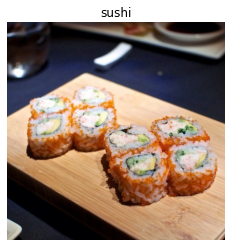

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [18]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

In [19]:
# Preprocess the data (prepare it for a model)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load the data
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [21]:
# import modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# create the model
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    
    Flatten(),
    Dense(10, activation="softmax")
])

# compile the model
model_1.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

# fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 15s 62ms/step - loss: 2.1775 - accuracy: 0.2003 - val_loss: 2.0408 - val_accuracy: 0.2692
Epoch 2/5
235/235 [==============================] - 15s 63ms/step - loss: 1.8929 - accuracy: 0.3436 - val_loss: 1.8987 - val_accuracy: 0.3388
Epoch 3/5
235/235 [==============================] - 15s 64ms/step - loss: 1.6035 - accuracy: 0.4488 - val_loss: 1.9462 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 15s 64ms/step - loss: 1.1325 - accuracy: 0.6237 - val_loss: 2.3076 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 16s 66ms/step - loss: 0.5801 - accuracy: 0.8148 - val_loss: 2.9583 - val_accuracy: 0.2660


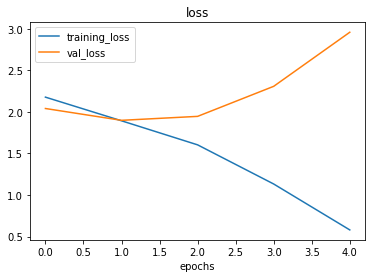

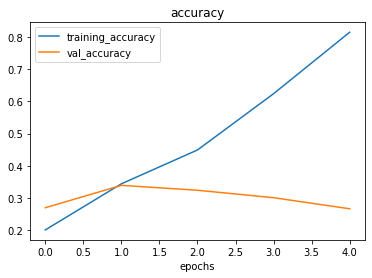

In [22]:
plot_loss_curves(history_1)

In [23]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [24]:
# Preprocess the data (prepare it for a model)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale and augument
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)


# load the agumented data
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [25]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_2 = tf.keras.models.clone_model(model_1)

# Compile the cloned model (using the same setup as previous models)
model_2.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [26]:
# Fit the model
history_2 = model_2.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 61s 260ms/step - loss: 2.1894 - accuracy: 0.1929 - val_loss: 2.0108 - val_accuracy: 0.2992
Epoch 2/5
235/235 [==============================] - 63s 268ms/step - loss: 2.0695 - accuracy: 0.2639 - val_loss: 1.9542 - val_accuracy: 0.2900
Epoch 3/5
235/235 [==============================] - 64s 272ms/step - loss: 1.9998 - accuracy: 0.3021 - val_loss: 1.9036 - val_accuracy: 0.3284
Epoch 4/5
235/235 [==============================] - 65s 278ms/step - loss: 1.9519 - accuracy: 0.3204 - val_loss: 1.8106 - val_accuracy: 0.3780
Epoch 5/5
235/235 [==============================] - 65s 275ms/step - loss: 1.9143 - accuracy: 0.3356 - val_loss: 1.7815 - val_accuracy: 0.3904
